# Challenge 1 - Tic Tac Toe

In this lab you will perform deep learning analysis on a dataset of playing [Tic Tac Toe](https://en.wikipedia.org/wiki/Tic-tac-toe).

There are 9 grids in Tic Tac Toe that are coded as the following picture shows:

![Tic Tac Toe Grids](tttboard.jpg)

In the first 9 columns of the dataset you can find which marks (`x` or `o`) exist in the grids. If there is no mark in a certain grid, it is labeled as `b`. The last column is `class` which tells you whether Player X (who always moves first in Tic Tac Toe) wins in this configuration. Note that when `class` has the value `False`, it means either Player O wins the game or it ends up as a draw.

Follow the steps suggested below to conduct a neural network analysis using Tensorflow and Keras. You will build a deep learning model to predict whether Player X wins the game or not.

## Step 1: Data Engineering

This dataset is almost in the ready-to-use state so you do not need to worry about missing values and so on. Still, some simple data engineering is needed.

1. Read `tic-tac-toe.csv` into a dataframe.
1. Inspect the dataset. Determine if the dataset is reliable by eyeballing the data.
1. Convert the categorical values to numeric in all columns.
1. Separate the inputs and output.
1. Normalize the input data.

In [4]:
# your code here
import pandas as pd

tic_tac_toe = pd.read_csv('tic-tac-toe.csv')
tic_tac_toe.head()

,TL,TM,TR,ML,MM,MR,BL,BM,BR,class
0,x,x,x,x,o,o,x,o,o,True
1,x,x,x,x,o,o,o,x,o,True
2,x,x,x,x,o,o,o,o,x,True
3,x,x,x,x,o,o,o,b,b,True
4,x,x,x,x,o,o,b,o,b,True


In [16]:
from sklearn.preprocessing import LabelEncoder

tic_tac_toe['class'] = pd.Series(LabelEncoder().fit_transform(tic_tac_toe['class']))
tic_tac_toe.head()

,TL,TM,TR,ML,MM,MR,BL,BM,BR,class
0,x,x,x,x,o,o,x,o,o,1
1,x,x,x,x,o,o,o,x,o,1
2,x,x,x,x,o,o,o,o,x,1
3,x,x,x,x,o,o,o,b,b,1
4,x,x,x,x,o,o,b,o,b,1


In [30]:
# assign features to inputs and target to outputs
inputs = tic_tac_toe.drop(['class'], axis = 1)
outputs = tic_tac_toe['class']

In [31]:
# One hot encoding for inputs
inputs = pd.get_dummies(inputs).astype('float')

## Step 2: Build Neural Network

To build the neural network, you can refer to your own codes you wrote while following the [Deep Learning with Python, TensorFlow, and Keras tutorial](https://www.youtube.com/watch?v=wQ8BIBpya2k) in the lesson. It's pretty similar to what you will be doing in this lab.

1. Split the training and test data.
1. Create a `Sequential` model.
1. Add several layers to your model. Make sure you use ReLU as the activation function for the middle layers. Use Softmax for the output layer because each output has a single lable and all the label probabilities add up to 1.
1. Compile the model using `adam` as the optimizer and `sparse_categorical_crossentropy` as the loss function. For metrics, use `accuracy` for now.
1. Fit the training data.
1. Evaluate your neural network model with the test data.
1. Save your model as `tic-tac-toe.model`.

In [34]:
# your code here
# split train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(inputs, outputs)

In [61]:
import tensorflow as tf
import numpy as np

In [95]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train.values, y_train.values, epochs=20)
val_loss, val_acc = model.evaluate(X_test.values, y_test.values)
model.save('tic_tac_toe.model')

Epoch 1/20
718/718 [==============================] - 0s 186us/sample - loss: 1.4417 - acc: 0.5669
Epoch 2/20
718/718 [==============================] - 0s 45us/sample - loss: 0.6039 - acc: 0.6950
Epoch 3/20
718/718 [==============================] - 0s 43us/sample - loss: 0.5195 - acc: 0.7437
Epoch 4/20
718/718 [==============================] - 0s 42us/sample - loss: 0.4788 - acc: 0.7591
Epoch 5/20
718/718 [==============================] - 0s 44us/sample - loss: 0.4279 - acc: 0.7911
Epoch 6/20
718/718 [==============================] - 0s 44us/sample - loss: 0.3745 - acc: 0.8370
Epoch 7/20
718/718 [==============================] - 0s 47us/sample - loss: 0.3126 - acc: 0.8872
Epoch 8/20
718/718 [==============================] - 0s 38us/sample - loss: 0.2528 - acc: 0.9373
Epoch 9/20
718/718 [==============================] - 0s 40us/sample - loss: 0.2053 - acc: 0.9499
Epoch 10/20
718/718 [==============================] - 0s 39us/sample - loss: 0.1522 - acc: 0.9791
Epoch 11/20
718/71

In [96]:
val_loss

0.0839377502600352

In [97]:
val_acc

0.975

## Step 3: Make Predictions

Now load your saved model and use it to make predictions on a few random rows in the test dataset. Check if the predictions are correct.

In [98]:
# your code here
new_model = tf.keras.models.load_model('tic_tac_toe.model')
predictions = new_model.predict(X_test.values)
print(np.argmax(predictions[0]))

W0801 13:28:50.191154 139802848909120 hdf5_format.py:263] Sequential models without an `input_shape` passed to the first layer cannot reload their optimizer state. As a result, your model isstarting with a freshly initialized optimizer.


0


## Step 4: Improve Your Model

Did your model achieve low loss (<0.1) and high accuracy (>0.95)? If not, try to improve your model.

But how? There are so many things you can play with in Tensorflow and in the next challenge you'll learn about these things. But in this challenge, let's just do a few things to see if they will help.

* Add more layers to your model. If the data are complex you need more layers. But don't use more layers than you need. If adding more layers does not improve the model performance you don't need additional layers.
* Adjust the learning rate when you compile the model. This means you will create a custom `tf.keras.optimizers.Adam` instance where you specify the learning rate you want. Then pass the instance to `model.compile` as the optimizer.
    * `tf.keras.optimizers.Adam` [reference](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/Adam).
    * Don't worry if you don't understand what the learning rate does. You'll learn about it in the next challenge.
* Adjust the number of epochs when you fit the training data to the model. Your model performance continues to improve as you train more epochs. But eventually it will reach the ceiling and the performance will stay the same.

### Adjusting number of Epochs

In [101]:
# your code here
x = [] # stores epoch increments
y = [] # stores acc
z = [] # stores loss

for e in range(5, 100, 5):
    model = tf.keras.models.Sequential()
    model.add(tf.keras.layers.Flatten())
    model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
    model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
    model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))
    model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])
    model.fit(X_train.values, y_train.values, epochs=20, verbose = 0)
    val_loss, val_acc = model.evaluate(X_test.values, y_test.values)
    x.append(e)
    y.append(val_acc)
    z.append(val_loss)
    print("\n---{} Epochs---\n".format(e))
    print("Loss: %f" % val_loss,"\nAccuracy: %f" % val_acc)

240/240 [==============================] - 0s 695us/sample - loss: 0.0562 - acc: 0.9750

---5 Epochs---

Loss: 0.056200 
Accuracy: 0.975000
240/240 [==============================] - 0s 718us/sample - loss: 0.0789 - acc: 0.9667

---10 Epochs---

Loss: 0.078882 
Accuracy: 0.966667
240/240 [==============================] - 0s 756us/sample - loss: 0.0656 - acc: 0.9792

---15 Epochs---

Loss: 0.065642 
Accuracy: 0.979167
240/240 [==============================] - 0s 746us/sample - loss: 0.0954 - acc: 0.9583

---20 Epochs---

Loss: 0.095439 
Accuracy: 0.958333
240/240 [==============================] - 0s 741us/sample - loss: 0.0716 - acc: 0.9750

---25 Epochs---

Loss: 0.071611 
Accuracy: 0.975000
240/240 [==============================] - 0s 774us/sample - loss: 0.0652 - acc: 0.9792

---30 Epochs---

Loss: 0.065170 
Accuracy: 0.979167
240/240 [==============================] - 0s 834us/sample - loss: 0.0746 - acc: 0.9708

---35 Epochs---

Loss: 0.074640 
Accuracy: 0.970833
240/240 [=====

Text(0, 0.5, 'Accuracy')

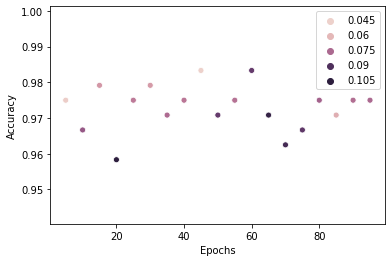

In [114]:
import seaborn as sns

sns.scatterplot(x, y, hue = z)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

**Which approach(es) did you find helpful to improve your model performance?**

In [ ]:
# your answer here
# number of epochs 

![Ironhack logo](https://i.imgur.com/1QgrNNw.png)

# Challenge 2: Tensorflow Hyperparameter Tuning

## Getting Started

From the lesson and Challenge 1 you should have noticed that understanding the concepts in neural network analysis such as *learning rate*, *epoch*, *optimizer*, *loss function* and so on is essential for you to optimize the neural network models you build. In this challenge you will study several learning pieces that discuss the hyperparameters in Tensorflow. 

**[Neural Networks: Structure](https://developers.google.com/machine-learning/crash-course/introduction-to-neural-networks/anatomy)**

**[Understanding Deep Learning with TensorFlow Playground](https://medium.com/@andrewt3000/understanding-tensorflow-playground-c20cdb7a250b)**

After that, complete [this exercise](https://developers.google.com/machine-learning/crash-course/introduction-to-neural-networks/playground-exercises) on tuning the Tensorflow hyperpamameters in the [Tensorflow Playground](https://playground.tensorflow.org/).

Finally, using what you have learned, try tuning the hyperparameters for the spiral dataset in order to reach training and test loss <0.05 as shown in the following:

![spiral output](challenge-2.png)

After you're done, submit a screenshot of your Playground including the following information:

* Epoch
* Learning rate
* Activation function
* Features included
* Hidden layers and neurons
* Test and training loss

**Do not google for the end solution!**

# Challenge 2 result

![result](result_nn.png)